### Contents:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering
    Plots
    Plot Analysis
    Cluster summary statistics

## 1. Importing libraries and data and removing categorical columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
df = pd.read_excel(R"C:\Users\ruthf\OneDrive\Documents\Data Immersion\Achievement 6\Project\02 Data\1. Orignal Data\StockX_data_add_columns.xlsx")

In [4]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit,Profit %,Release Year,Sold Year,Days since release
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California,877.0,3.986364,2016,2017,342
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California,465.0,2.113636,2016,2017,282
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California,470.0,2.136364,2016,2017,282
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky,855.0,3.886364,2016,2017,282
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island,608.0,2.763636,2017,2017,202


In [5]:
# Drop categorical columns
df2 = df[['Sale Price','Retail Price','Shoe Size','Profit','Days since release', 'Release Year']]

In [6]:
df2.head()

,Sale Price,Retail Price,Shoe Size,Profit,Days since release,Release Year
0,1097.0,220,11.0,877.0,342,2016
1,685.0,220,11.0,465.0,282,2016
2,690.0,220,11.0,470.0,282,2016
3,1075.0,220,11.5,855.0,282,2016
4,828.0,220,11.0,608.0,202,2017


### 2. The Elbow technique

In [7]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [8]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-19089740382.3438,
 -10855959205.39581,
 -6885682917.277613,
 -4179308231.858758,
 -3179401820.166903,
 -2594225841.022461,
 -2191985033.6476665,
 -1852385474.1843333,
 -1580181930.518591]

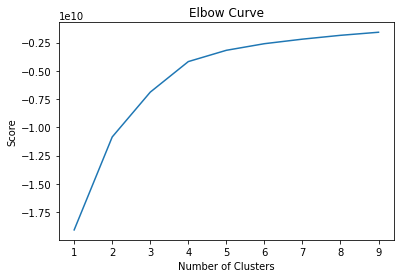

In [9]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### 4 has been identified as the optimum amount of clusters using the elbow technique based on the elbow curve in the chart.

### 3. k-means clustering

In [10]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4)

In [11]:
# Fit the k-means object to the data.

kmeans.fit(df2)

KMeans(n_clusters=4)

In [12]:
# Create new column in df2 to show clusters
df2['clusters'] = kmeans.fit_predict(df2)

C:\Users\ruthf\AppData\Local\Temp\ipykernel_28792\1258806752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clusters'] = kmeans.fit_predict(df2)


In [13]:
df2.head()

,Sale Price,Retail Price,Shoe Size,Profit,Days since release,Release Year,clusters
0,1097.0,220,11.0,877.0,342,2016,0
1,685.0,220,11.0,465.0,282,2016,0
2,690.0,220,11.0,470.0,282,2016,0
3,1075.0,220,11.5,855.0,282,2016,0
4,828.0,220,11.0,608.0,202,2017,0


In [14]:
df2['clusters'].value_counts()

3    51361
0    23806
1    22950
2     1839
Name: clusters, dtype: int64

### Plots

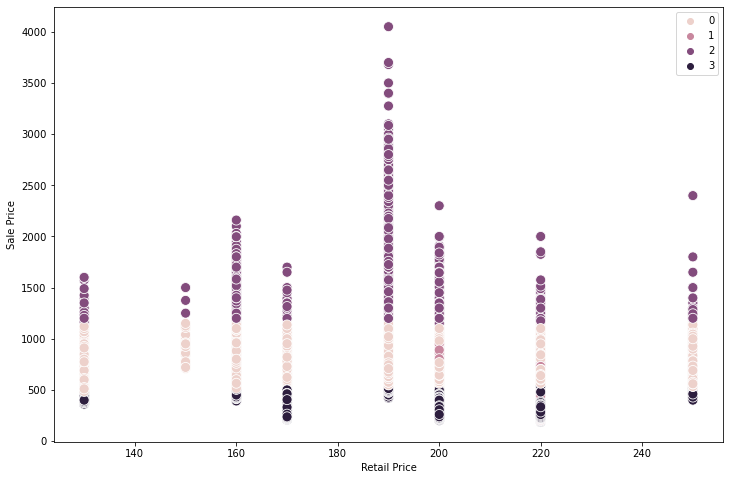

In [15]:
# Plot the clusters for the "Sale Price" and "Retail Price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Retail Price'], y=df2['Sale Price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Retail Price') # Label x-axis.
plt.ylabel('Sale Price') # Label y-axis.
plt.show()

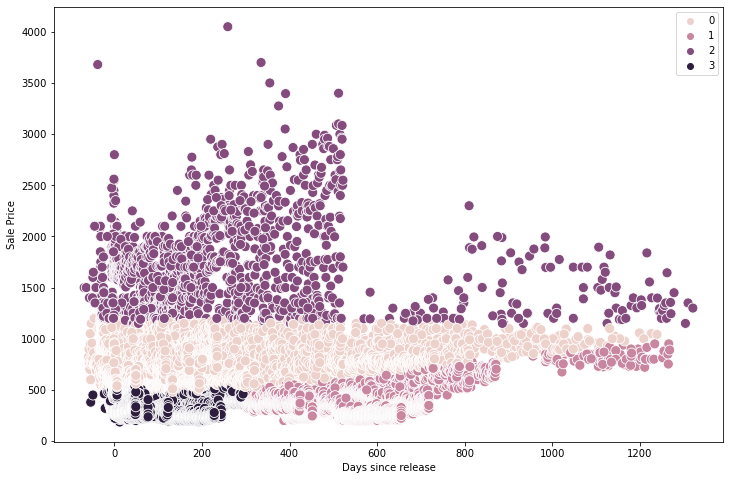

In [16]:
# Plot the clusters for the "Days since release" and "Sale Price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Days since release'], y=df2['Sale Price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Days since release') 
plt.ylabel('Sale Price') 
plt.show()

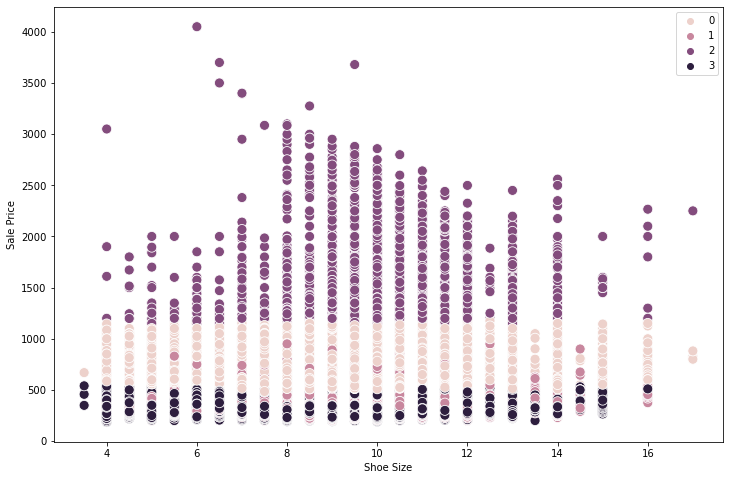

In [17]:
# Plot the clusters for the "Shoe Size" and "Sale Price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Shoe Size'], y=df2['Sale Price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Shoe Size') 
plt.ylabel('Sale Price') 
plt.show()

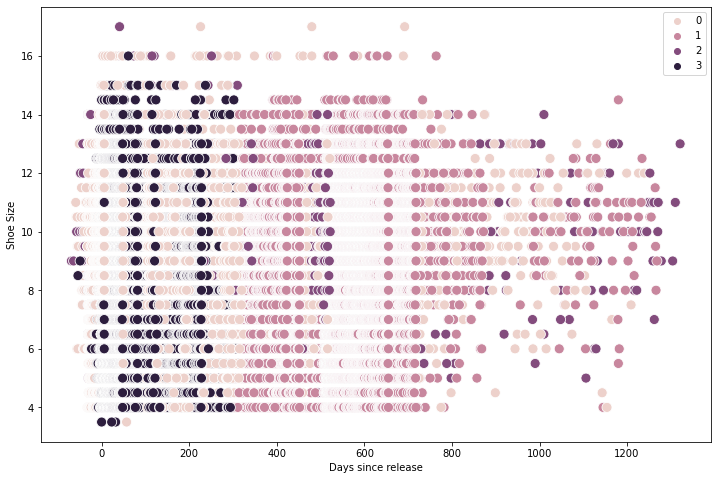

In [18]:
# Plot the clusters for the "Shoe Size" and "Days since release" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Days since release'], y=df2['Shoe Size'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Days since release') 
plt.ylabel('Shoe Size') 
plt.show()

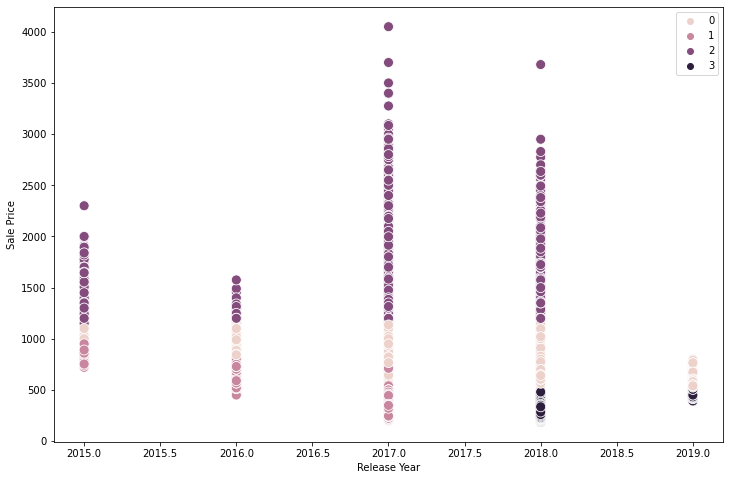

In [19]:
# Plot the clusters for the "Sale Price" and "Release Year" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Release Year'], y=df2['Sale Price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Release Year') 
plt.ylabel('Sale Price') 
plt.show()

### Plot Analysis

#### 1. Sale price and retail price - All 4 clusters contatin a variety of retail prices but cluster 2 contains the highest sale prices.  This hasn't help us gain any further insight on the relationship (if any) between retail price and sale price.

#### 2. Days since release and sale price - Cluster 3 (black) contains shoes that were released relatively quickly and sold for a lower sale price and cluster 1 (pink) contains shoes that sold a while after the release but also at the lower end of the price scale.  Whereas cluster 2 (purple) again contains all the higher price data points across the full time period. These clusters could be useful to explore further to determine why cluster 1 did not sell for the higher price.

#### 3. Shoe Size and price -  The clusters here don't really give us any insight.  Other than visualising that sizes under 8 (except for a couple of outliers) do not get a high sale price.

#### 4. Shoe Size and days since release - No relationship or pattern can be identified from this plot.

#### 5. Sale Price and release year - Sneakers relaesed in 2017 and 2018 achieved the highest sale price, represented by cluster 2 (purple).  It would be interesting to see this alongside sold year or days since release to see if there is any pattern there.  

#### This analysis indicates that there is not one driving numeric variable that influences sale price.  Sale price could therefore be driven by a categorical variable such as brand, sneaker model or even buyer region.

### Cluster summary statistics

In [20]:
df2.loc[df2['clusters'] == 3, 'clusters'] = 'black'
df2.loc[df2['clusters'] == 2, 'clusters'] = 'purple'
df2.loc[df2['clusters'] == 1, 'clusters'] = 'pink'
df2.loc[df2['clusters'] == 0, 'clusters'] = 'light pink'

C:\Users\ruthf\AppData\Local\Temp\ipykernel_28792\3825496936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2['clusters'] == 3, 'clusters'] = 'black'


In [39]:
summary = df2.groupby('clusters').agg({'Retail Price':['mean', 'median'], 
                         'Sale Price':['mean', 'median'], 
                         'Shoe Size':['mean', 'median'],
                          'Days since release':['mean', 'median']})
summary

Retail Price          Sale Price          Shoe Size         \
                 mean median         mean  median       mean median   
clusters                                                              
0          189.747783  190.0   719.185173   685.0   9.630774   10.0   
1          219.745431  220.0   340.500513   290.0   9.360782    9.5   
2          211.959663  220.0   343.657035   345.0   9.193491    9.5   
3          185.572700  190.0  1673.734459  1600.0  10.081009   10.0   

         Days since release         
                       mean median  
clusters                            
0                 90.785892   39.0  
1                546.772601  569.0  
2                 50.253114   23.0  
3                223.279525  148.0

#### The purple cluster (2) has the best metrics in terms of the lowest mean retail price and highest mean and median sale price.  With the sales occuring an average of 148 days since release.  The pink cluster has the worst metrics with the highest retail price, lowest sale price and longest time to sell.
#### Both the light pink and black clusters have a higher average sales price.  There's a substantial difference for these two clusters on days since release, but this really doesn't give us any insight on what makes a sneaker sell quicker and at a higher price.  We might expect that the cluster with the lowest days since release also had the lowest sale price (indicating a lower sale price would result in a faster sale), however this is not the case.  

In [40]:
summary.to_clipboard()

In [22]:
df3= df[['Sale Price','Days since release']]

In [24]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [25]:
score = [kmeans[i].fit(df3).score(df3) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-11946191964.066273,
 -7203355143.6251335,
 -3939842781.6754785,
 -2623413102.9407635,
 -2091410818.5070047,
 -1683943549.6763093,
 -1353338293.6738827,
 -1168788623.6407497,
 -1043247124.9199015]

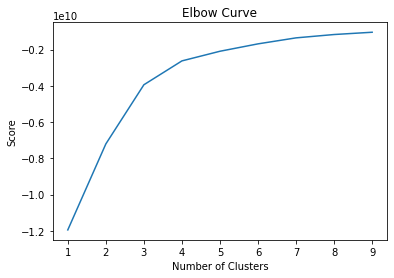

In [26]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [27]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4)

In [29]:
# Fit the k-means object to the data.

kmeans.fit(df3)

KMeans(n_clusters=4)

In [31]:
# Create new column in df2 to show clusters
df3['clusters'] = kmeans.fit_predict(df3)

C:\Users\ruthf\AppData\Local\Temp\ipykernel_28792\2631910907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['clusters'] = kmeans.fit_predict(df3)


In [32]:
df3

,Sale Price,Days since release,clusters
0,1097.0,342,0
1,685.0,282,0
2,690.0,282,0
3,1075.0,282,0
4,828.0,202,0
...,...,...,...
99951,565.0,49,0
99952,598.0,49,0
99953,605.0,49,0
99954,650.0,49,0


In [33]:
df3['clusters'].value_counts()

1    52132
2    24504
0    21635
3     1685
Name: clusters, dtype: int64

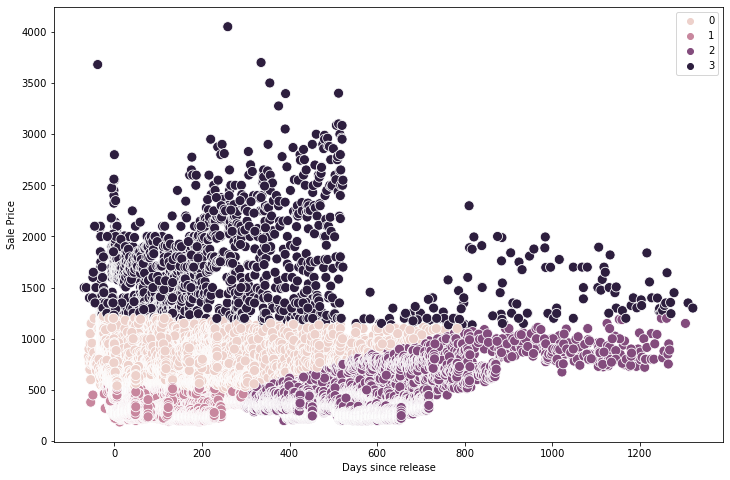

In [34]:
# Plot the clusters for the "Sale Price" and "Days since release" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df3['Days since release'], y=df3['Sale Price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Days since release') # Label x-axis.
plt.ylabel('Sale Price') # Label y-axis.
plt.show()

In [35]:
df2.to_clipboard()